In [5]:
import os
import json
import numpy as np
from PIL import Image
from model import get_model
from matplotlib import pyplot as plt
from scripts.data_preprocess import get_data
from keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Flatten, Dense, Activation, MaxPooling2D, Dropout, Input, BatchNormalization

## Load the data

In [56]:
x, y = get_data(0, 30000) # load first 30000 images for training

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.05, random_state=42)

x.shape, x_val.shape

## Train your own model

In [74]:
model = get_model()

model.compile(loss='mse',optimizer='adam', metrics=['mae'])

model.fit(x, y, shuffle=True, batch_size=64, epochs=2, validation_data=(x_val, y_val))

## Or load pretrained model

In [89]:
model = load_model('saved_model')

## Test model

In [40]:
x_test, y_test = get_data(30000, 31000) # load testing images

In [41]:
model.evaluate(x_test, y_test)

32/32 [==============================] - 3s 91ms/step - loss: 0.0105 - mae: 0.0751


[0.01048954389989376, 0.07508410513401031]

## Test a sample

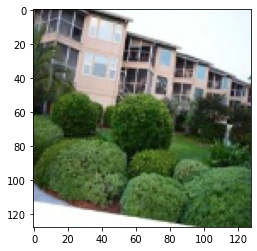

image angel: 9.47
predicted angel: 9


In [88]:
i = 25
plt.imshow(x_test[i].astype('float64')+.5)
plt.show()
a = model.predict(x_test[i].reshape((1,128,128,3)))
print("image angel:", round(a[0][0]*30,2))
print("predicted angel:", round(y_test[i][0]*30))